In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
# Create color maps (one color for each class)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [3]:
# import some data to play with
iris = datasets.load_iris()
X_all = iris.data #
y = iris.target # 

In [4]:
# Verify datas structures
print(X_all.shape)
print(y.shape)
print(np.unique(y))

(150, 4)
(150,)
[0 1 2]


Le tableau X_all contient 150 lignes de 4 colonnes (les valeurs des 4 features)
Le tableau y contietn 150 lignes de 1 colonne (la classe)
np.unique renvoi un tableau avec les valeurs uniques de y (les 3 classes possibles)


In [5]:
# Verify data values and types
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8               3.4                1.6               0.2   
12                 4.8               3.0                1.4               0.1   
13                 4.3               3.0                1.1               0.1   
14                 5.8               4.0                1.2               0.2   
15                 5.7               4.4                1.5               0.4   
16                 5.4               3.9                1.3               0.4   
17                 5.1               3.5                1.4               0.3   
18                 5.7               3.8                1.7               0.3   
19                 5.1               3.8                1.5               0.3   
20                 5.4               3.4                1.7               0.2   
21                 5.1               3.7                1.5               0.4   
22                 4.6               3.6                1.0               0.2   
23                 5.1               3.3                1.7               0.5   
24                 4.8               3.4                1.9               0.2   
25                 5.0               3.0                1.6               0.2   
26                 5.0               3.4                1.6               0.4   
27                 5.2               3.5                1.5               0.2   
28                 5.2               3.4                1.4               0.2   
29                 4.7               3.2                1.6               0.2   
..                 ...               ...                ...               ...   
120                6.9               3.2                5.7               2.3   
121                5.6               2.8                4.9               2.0   
122                7.7               2.8                6.7               2.0   
123                6.3               2.7                4.9               1.8   
124                6.7               3.3                5.7               2.1   
125                7.2               3.2                6.0               1.8   
126                6.2               2.8                4.8               1.8   
127                6.1               3.0                4.9               1.8   
128                6.4               2.8                5.6               2.1   
129                7.2               3.0                5.8               1.6   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
132                6.4               2.8                5.6               2.2   
133                6.3               2.8                5.1               1.5   
134                6.1               2.6                5.6               1.4   
135                7.7               3.0                6.1               2.3   
136                6.3               3.4                5.6               2.4   
137                6.4              

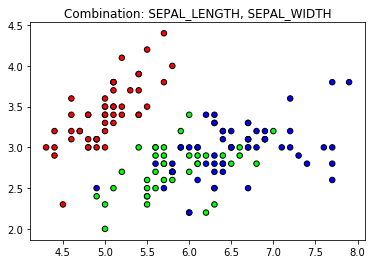

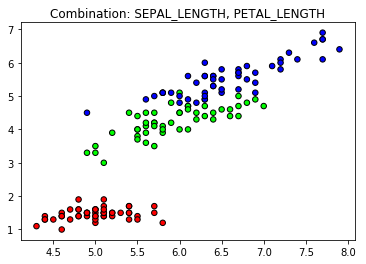

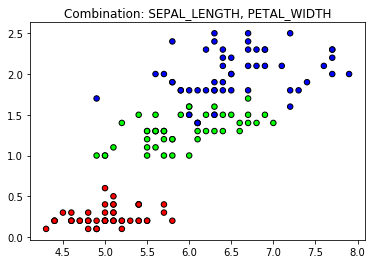

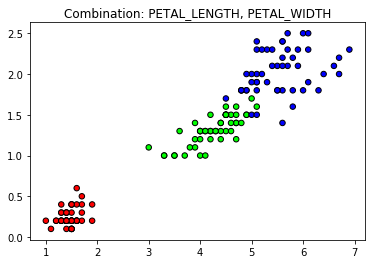

In [6]:
# TODO: using scatter plots, find which combination of 2 features will work better
# (human decision)
SEPAL_LENGTH = 0
SEPAL_WIDTH = 1
PETAL_LENGTH = 2
PETAL_WIDTH = 3

texVal = ["SEPAL_LENGTH","SEPAL_WIDTH","PETAL_LENGTH","PETAL_WIDTH"]

# Test all possibles solutions (6)
first = 0
while first < 3:
    second = first + 1
    while second <= 3:
        # Copy a partial matrix in another
        X = X_all[:, [first, second]] # Use 2 features only
        # Plot the points (c is the point, cmap -> colorMap , edgecolor -> around color)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=30)
        plt.title("Combination: %s, %s" % (texVal[first], texVal[second]))
        plt.show()
        second += 1
    first += 1

Q1: Which combination of 2 features will you use and why?

The last combination for 2 of 4 features seems to be the best, I keep it
    - Each feature has a well-defined area, especially red. 
    - The border length between the green and blue feature area is minimal.
    
    

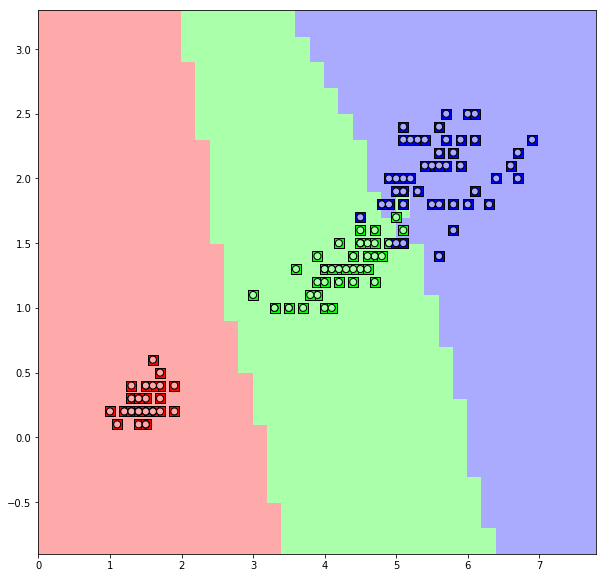

In [7]:
# Classification with PETAL_LENGTH and PETAL_WIDTH
X = X_all[:, [PETAL_LENGTH, PETAL_WIDTH]] # Use 2 features only
# we create an instance of Neighbours Classifier and fit the data.

# test for 15 neighbors
n_neighbors = 15
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
y_pred = clf.predict(X)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
# TODO: add the decision boundaries to the plot

plt.figure(figsize=(10,10))
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# TODO: visualize your results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap_bold,  edgecolor='k', s=100, marker='s')
plt.scatter(X[:, 0], X[:, 1], c=y,      cmap=cmap_light, edgecolor='k', s=49, marker='o')
plt.show()

Q2: Use your plot to analyze the results. Do you think your results are good/bad? Why?

The test set is the same as the reference set (there is no training with K-NN). Each point will be perfectly predicted, even with a single neighbor.

In [8]:
# More complicated ....
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./')

print(mnist.data.shape)
print(mnist.target.shape)
print(np.unique(mnist.target))

(70000, 784)
(70000,)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Q3: Describe this dataset: classes, features, purpose of a classification task, …

MNIST : https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST

Each line of mnist.data is a 28*28 bitmap of one character (black/white pixels)
The differents target (classes) are 0 to 9.

It's à standard dataset for handwritting number classification.

The wiki specify a ratio of 90/10 between trainning/verification (60000/10000).

In [9]:
from sklearn.model_selection import train_test_split

# We are sampling (1/100) => data = 70000 / 100 = 700 rows
X = mnist.data[::100]
y = mnist.target[::100]

print(X.shape)
print(y.shape)

# Split data between trainning and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 5 by default
n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(y_pred.shape)
print(y_test.shape)
print(y_pred)
print(y_test)

(700, 784)
(700,)
(70,)
(70,)
[1. 8. 6. 2. 5. 3. 3. 4. 5. 9. 7. 8. 3. 1. 9. 9. 7. 8. 2. 4. 5. 5. 9. 4.
 4. 5. 7. 6. 4. 3. 2. 8. 2. 1. 7. 7. 9. 1. 8. 2. 2. 1. 4. 9. 9. 9. 6. 5.
 1. 2. 5. 1. 9. 0. 1. 3. 8. 0. 4. 6. 0. 6. 8. 1. 6. 9. 3. 0. 2. 1.]
[2. 8. 6. 2. 5. 3. 3. 4. 4. 5. 7. 5. 3. 1. 9. 9. 7. 8. 2. 8. 5. 5. 9. 4.
 4. 5. 7. 0. 4. 3. 2. 8. 2. 1. 2. 7. 9. 8. 8. 2. 2. 1. 4. 9. 4. 9. 6. 5.
 1. 2. 5. 1. 9. 0. 1. 3. 8. 2. 4. 6. 0. 6. 8. 1. 6. 9. 3. 0. 2. 7.]


y_pred show the predicted values of dataset and y_test the real values. No need to plot, just count correct values and incorrect values to know accuracy and other metrics...

In [10]:
import sklearn.metrics as metrics

accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred, average=None)
classification_report = metrics.classification_report(y_test, y_pred)
print('Accuracy =', accuracy_score)
print('Precision =', precision_score)
print('Report =\n', classification_report)

Accuracy = 0.8428571428571429
Precision = [0.75       0.7        1.         1.         0.85714286 0.85714286
 0.83333333 0.8        0.85714286 0.8       ]
Report =
              precision    recall  f1-score   support

        0.0       0.75      0.75      0.75         4
        1.0       0.70      1.00      0.82         7
        2.0       1.00      0.73      0.84        11
        3.0       1.00      1.00      1.00         6
        4.0       0.86      0.75      0.80         8
        5.0       0.86      0.75      0.80         8
        6.0       0.83      1.00      0.91         5
        7.0       0.80      0.80      0.80         5
        8.0       0.86      0.75      0.80         8
        9.0       0.80      1.00      0.89         8

avg / total       0.86      0.84      0.84        70



Accuracy:   Number of correct prediction / Number of try
Precision:  The ratio tp / (tp + fp) where tp is the number of true positives 
            and fp the number of false positives. The precision is intuitively 
            the ability of the classifier not to label as positive a sample 
            that is negative.

            The best value is 1 and the worst value is 0.
Report:     Build a text report showing the main classification metrics
            
            Precision is the ability of the classifier not to label as positive 
            a sample that is negative.
            
            Recall is the ability of the classifier to find all the positive samples.
            
            F-measure (F_\beta and F_1 measures) can be interpreted as a weighted 
            harmonic mean of the precision and recall. A F_\beta measure reaches 
            its best value at 1 and its worst score at 0. With \beta = 1,  F_\beta 
            and F_1 are equivalent, and the recall and the precision are equally important.
            
            Support show the number of time the class as be founded